<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Practice-Evaluation-02/Mahdi_Practice_Q1_Solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Practice-Evaluation-02/Office%20Dataset.csv')

In [2]:
print(data.head())
print(data.describe())
print(data.info())

   Coffee_Consumption  Desk_Proximity  Hours_of_Sleep  Work_Output
0                   3             2.5             7.5           32
1                   2             3.0             6.0           24
2                   4             2.2             6.8           36
3                   5             1.8             5.5           40
4                   1             4.0             8.0           18
       Coffee_Consumption  Desk_Proximity  Hours_of_Sleep  Work_Output
count            21.00000       21.000000       21.000000    21.000000
mean              3.00000        2.842857        6.728571    31.428571
std               1.30384        0.620138        0.764292     6.867106
min               1.00000        1.800000        5.000000    18.000000
25%               2.00000        2.400000        6.300000    27.000000
50%               3.00000        2.800000        6.800000    32.000000
75%               4.00000        3.300000        7.200000    36.000000
max               5.00000     

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

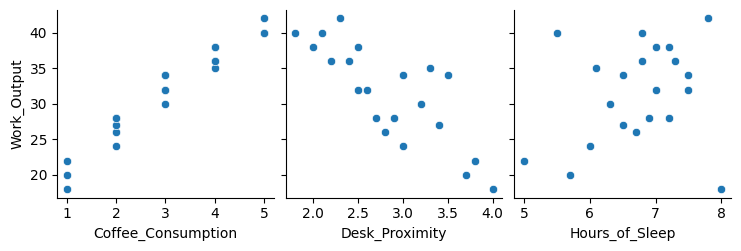

In [4]:
sns.pairplot(data,x_vars=['Coffee_Consumption','Desk_Proximity','Hours_of_Sleep'],y_vars='Work_Output',kind='scatter')
plt.show()

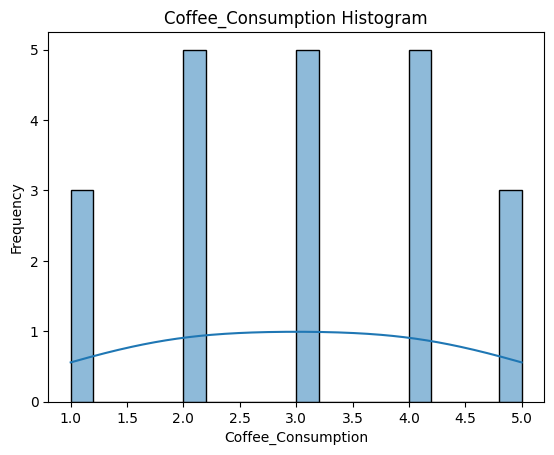

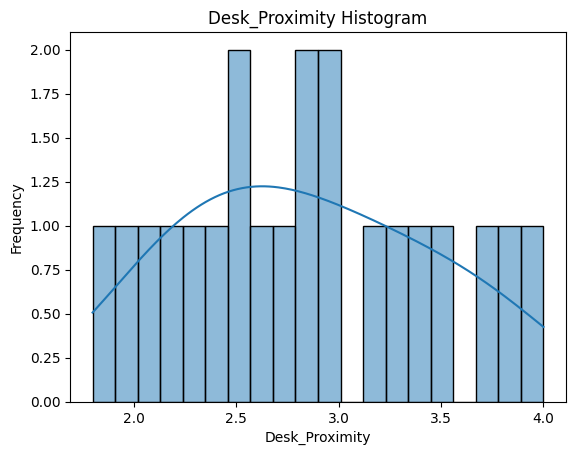

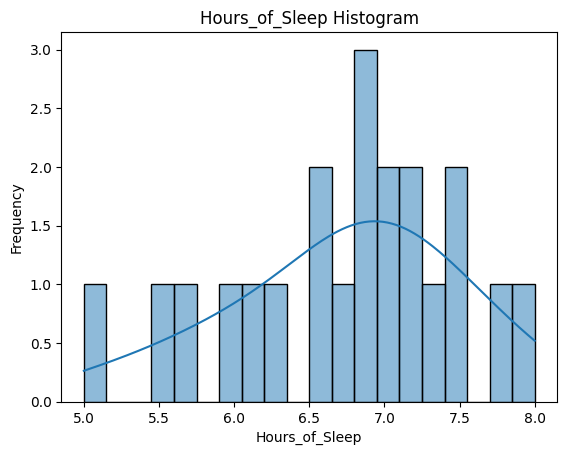

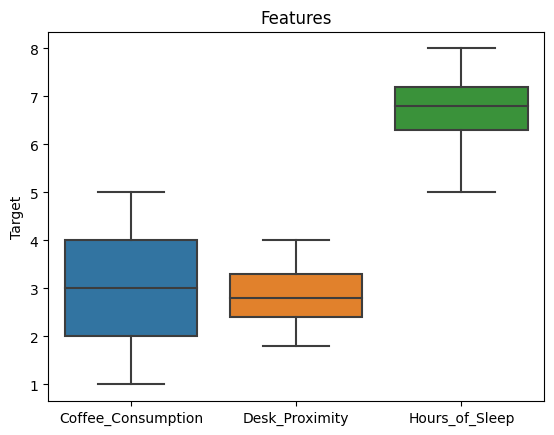

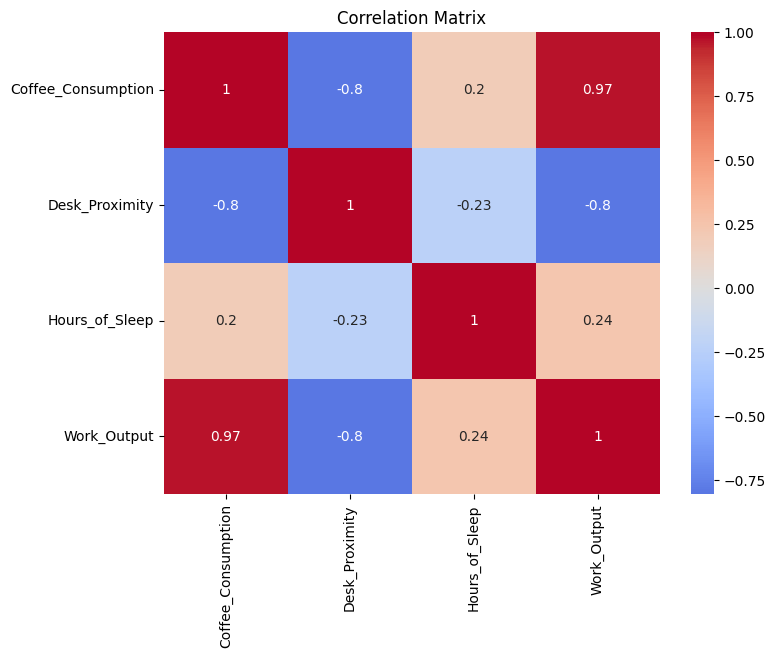

In [5]:
sns.histplot(data=data,x='Coffee_Consumption',bins=20,kde=True)
plt.title('Coffee_Consumption Histogram')
plt.xlabel('Coffee_Consumption')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data,x='Desk_Proximity',bins=20,kde=True)
plt.title('Desk_Proximity Histogram')
plt.xlabel('Desk_Proximity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=data,x='Hours_of_Sleep',bins=20,kde=True)
plt.title('Hours_of_Sleep Histogram')
plt.xlabel('Hours_of_Sleep')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=data[['Coffee_Consumption','Desk_Proximity','Hours_of_Sleep']])
plt.title('Features')
plt.ylabel('Target')
plt.show()

correlation_matrix=data[['Coffee_Consumption','Desk_Proximity','Hours_of_Sleep','Work_Output']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix')
plt.show()

In [6]:
null_counts=data.isnull().sum()

null_counts

Coffee_Consumption    0
Desk_Proximity        0
Hours_of_Sleep        0
Work_Output           0
dtype: int64

In [7]:
data_cleaned=data.dropna()

In [8]:
X=data_cleaned[['Coffee_Consumption','Desk_Proximity','Hours_of_Sleep']]
y = data_cleaned['Work_Output']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE", mse)
print("R2", r2)

MSE 2.046170339630701
R2 0.9379195892102336


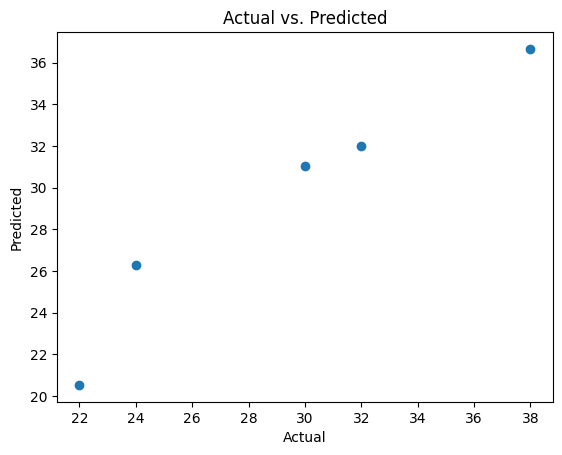

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


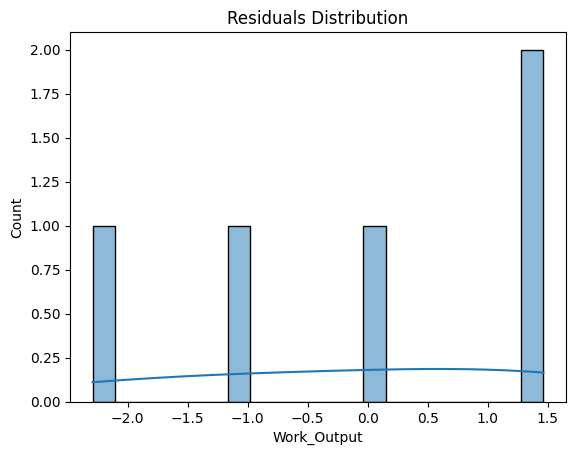

In [15]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals Distribution')
plt.show()



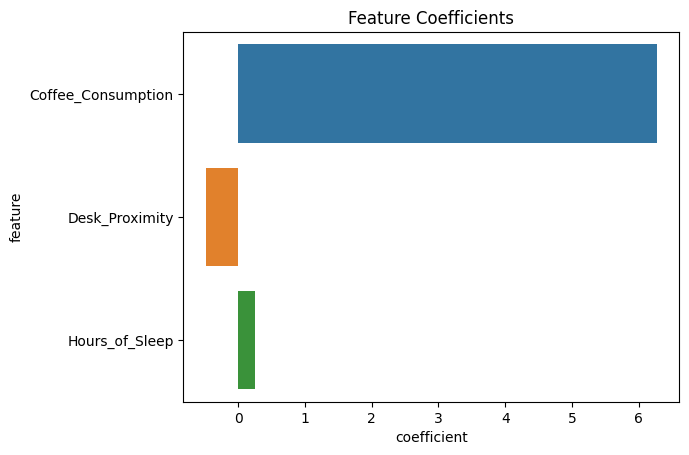

In [16]:
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()

In [17]:
quelist = [[3,2.5,7.5]]

quedf = pd.DataFrame(quelist, columns=['Coffee_Consumption','Desk_Proximity','Hours_of_Sleep'])
print(quedf)
quescaled = scaler.transform(quedf)
print(quescaled)

   Coffee_Consumption  Desk_Proximity  Hours_of_Sleep
0                   3             2.5             7.5
[[-0.0949158  -0.46630748  1.01146144]]


In [18]:
que_pred = model.predict(quescaled)
que_pred

array([32.01088968])